# Figure - Behavior

[Main](#Main)
1. lickograms(3x4): dn=505, creb=016, gcamp=503
2. Fraction of anticipatory licks
    1. Day in condition
    2. Session in day (I)
    3. Session in day (II)

[Supplemental](#Supplemental)
1. Anticipatory licks by Mouse
    1. gcamp
    2. creb
    3. dn
2. Fraction of licks in reward
    1. Day in condition
    2. Session in day (I)
    3. Session in day (II)

[Stats](#Stats) 


## Import modules and params

In [9]:
FIG_FORMAT = 'interactive'
#FIG_FORMAT = 'interactive'
circ_var_pcs = False
label_every_n=1

# plot

import matplotlib as mpl
if FIG_FORMAT == 'svg':
    mpl.use('agg')
elif FIG_FORMAT == 'pdf':
    mpl.use('pdf')
elif FIG_FORMAT == 'interactive':
    %matplotlib inline
    #%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn.apionly as sns
from mpl_toolkits.axes_grid.inset_locator import inset_axes

#warnings
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

# python
import numpy as np
import os.path
import sys
import itertools as it

# lab
import lab
import lab.analysis.place_cell_analysis as place
from lab.plotting import plot_metric
from lab.analysis import intervals as inter
import lab.analysis.imaging_analysis as ia
from lab import ExperimentSet
import lab.plotting as plotting
sys.path.insert(0, '/home/matt/code/analysis/mjd/')
import creb_analysis as creb
import lab.figures.place_cell_figures as pcf
from lab.plotting import plot_metric, stackedText, right_label
import lab.analysis.reward_analysis as ra

# import styles from creb_analysis
channel=creb.CHANNEL
label=creb.IMAGING_LABEL
markers=creb.markers
linestyles=creb.linestyles

group_labels=creb.labels
CREB_label=creb.labels[0]
DN_label=creb.labels[1]
GCAMP_label=creb.labels[2]

colors = creb.colors
CREB_color=creb.colors[0]
DN_color=creb.colors[1]
GCAMP_color=creb.colors[2]

# save_dir = creb.fig_save_dir
# filename = 'FigX_stability.{}'.format(FIG_FORMAT)

## Load experiments

In [6]:
exptDicts = creb.initializeExperimentGroups('hidden',from_file=True,
            save_to_json=False, signal='spikes')

# Behavior
exptGrps=[exptDicts['CREB_hidden_behavior_set'],
        exptDicts['DN_hidden_behavior_set'],
        exptDicts['GCAMP_hidden_behavior_set']]

#exptGrps=[exptDicts['CREB_place_set'],
#        exptDicts['DN_place_set'],
#        exptDicts['GCAMP_place_set']]

# FILTERS
roi_filters=[None] * len(exptGrps)

# SQL
exptSet = ExperimentSet('mdavis.sql')

LOADED EXPERIMENT GROUPS: CREB,DN,GCAMP


In [ ]:
# check grps
for expt in exptGrps[1]:
    print( expt.parent.get('mouseID'),expt.get('startTime'))

# Main

In [12]:
plt.rcParams.update({'lines.linewidth': 2,
                     'axes.titlesize': 16,
                     'axes.labelsize': 16,
                     'xtick.labelsize': 12,
                     'ytick.labelsize': 12,
                     'font.size': 10,
                     'pdf.fonttype': 42,
                     'xtick.major.size': 5,
                     'xtick.major.width':2,
                     'xtick.major.pad': 3,
                     'ytick.major.size': 5,
                     'ytick.major.pad': 3,
                     'ytick.major.width':2,
                     'svg.fonttype': 'none', #path
                     'font.sans-serif': ['DejaVu Sans'],
                     'font.serif': ['DejaVu Serif'],
                     'font.monospace': ['DejaVu Sans Mono'],
                     'axes.facecolor': 'white',
                     'savefig.facecolor': 'white',
                     'figure.facecolor' : 'white'
                     })

def label_conditions(ax):
    ax.text(1 / 4., .95, r'$\mathrm{I}$', ha='center', va='center',
            transform=ax.transAxes, fontsize=20)
    ax.text(3 / 4., .95, r'$\mathrm{II}$', ha='center', va='center',
            transform=ax.transAxes, fontsize=20)
    ax.axvline(2.5, color='k', linestyle=':',linewidth=3)

def day_number_only_label(ax):
    xticklabels = ax.get_xticklabels()
    new_labels = []
    for label in xticklabels:
        _, day = label.get_text().split('_')
        day = str(int(day[0]) + 1)
        new_labels.append(day)
        # _, day = label.get_text().split(", '")
        # day = label.get_text()
        # day = str(int(day) + 1)
    ax.set_xticklabels(new_labels, ha='center', va='top')    

## Lick-o-grams

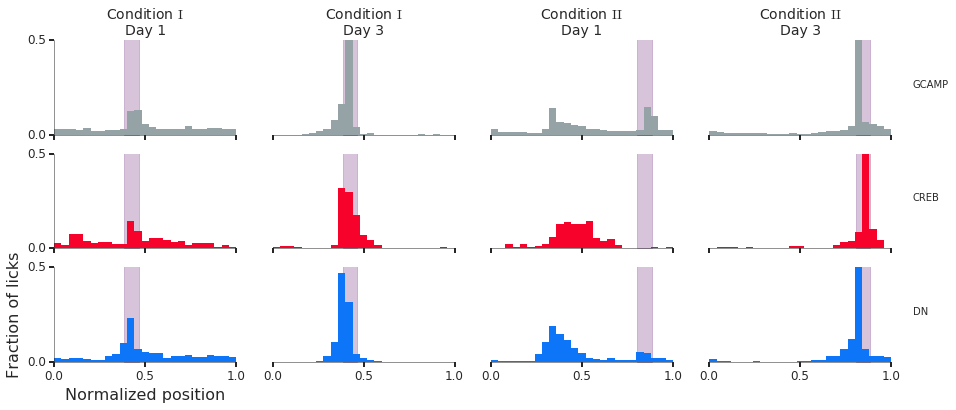

In [8]:
pos_bins=25 # OG = 20

#fig = plt.figure(figsize=(8.5, 11))
fig = plt.figure(figsize=(15, 20))

#gs2 = plt.GridSpec(10,3)

gs1 = plt.GridSpec(10, 4)
gcamp_lick_axs = [fig.add_subplot(gs1[0, 0]),
                fig.add_subplot(gs1[0, 1]),
                fig.add_subplot(gs1[0, 2]),
                fig.add_subplot(gs1[0, 3])]
creb_lick_axs = [fig.add_subplot(gs1[1, 0]),
                fig.add_subplot(gs1[1, 1]),
                fig.add_subplot(gs1[1, 2]),
                fig.add_subplot(gs1[1, 3])]
dn_lick_axs = [fig.add_subplot(gs1[2, 0]),
                fig.add_subplot(gs1[2, 1]),
                fig.add_subplot(gs1[2, 2]),
                fig.add_subplot(gs1[2, 3])]
    

# licks plots
gcamp_lick_expts = [exptSet.grabExpt('mjd500', '2017-11-29-14h43m30s'),
                 exptSet.grabExpt('mjd503', '2017-12-01-17h02m09s'),
                 exptSet.grabExpt('mjd503', '2017-12-02-14h53m40s'),
                 exptSet.grabExpt('mjd503', '2017-12-04-19h19m30s')]
creb_lick_expts = [exptSet.grabExpt('mjd016', '2017-08-28-14h05m50s'),
                 exptSet.grabExpt('mjd016', '2017-08-30-13h05m08s'),
                 exptSet.grabExpt('mjd016', '2017-08-31-12h09m10s'),
                 exptSet.grabExpt('mjd016', '2017-09-02-13h25m27s')]
dn_lick_expts = [exptSet.grabExpt('mjd505', '2017-11-29-16h36m30s'),
                 exptSet.grabExpt('mjd505', '2017-12-01-17h28m02s'),
                 exptSet.grabExpt('mjd505', '2017-12-02-15h19m57s'),
                 exptSet.grabExpt('mjd505', '2017-12-04-19h47m20s')]


shade_color = sns.xkcd_rgb['dark lilac']
for ax, expt in zip(creb_lick_axs, creb_lick_expts):
    expt.licktogram(
        ax=ax, plot_belt=False, nPositionBins=pos_bins, color=CREB_color,
        linewidth=0, shade_reward=True, shade_color=shade_color,alpha=1.0)
for ax, expt in zip(dn_lick_axs, dn_lick_expts):
    expt.licktogram(
        ax=ax, plot_belt=False, nPositionBins=pos_bins, color=DN_color,
        linewidth=0, shade_reward=True, shade_color=shade_color,alpha=1.0)
for ax, expt in zip(gcamp_lick_axs, gcamp_lick_expts):
    expt.licktogram(
        ax=ax, plot_belt=False, nPositionBins=pos_bins, color=GCAMP_color,
        linewidth=0, shade_reward=True, shade_color=shade_color,alpha=1.0)

# ticks
for ax in creb_lick_axs + dn_lick_axs + gcamp_lick_axs:
    ax.set_ylim(0, 0.5)
    ax.set_yticks([0, 0.25, 0.5])
    ax.set_xticks([0, 0.5, 1])
    ax.set_xticklabels(['0.0', '0.5', '1.0'])
    sns.despine(ax=ax)
    ax.set_title('')

for ax in gcamp_lick_axs:
    ax.set_xlabel('')
    ax.tick_params(labelbottom=False)

for ax in creb_lick_axs:
    ax.set_xlabel('')  
    ax.tick_params(labelbottom=False)

for ax in dn_lick_axs[1:]:
    ax.set_xlabel('')

for ax, label in zip(gcamp_lick_axs, [
        r'Condition $\mathrm{I}$' + '\nDay 1',
        r'Condition $\mathrm{I}$' + '\nDay 3',
        r'Condition $\mathrm{II}$' + '\nDay 1',
        r'Condition $\mathrm{II}$' + '\nDay 3']):
    ax.set_title(label,size=14)

for ax in it.chain(gcamp_lick_axs[1:], creb_lick_axs[1:],
                  dn_lick_axs[1:]):
    ax.set_ylabel('')
    sns.despine(ax=ax, left=True, top=True, right=True)

for ax in gcamp_lick_axs + creb_lick_axs + dn_lick_axs:
    ax.spines['bottom'].set_linewidth(0.5)

gcamp_lick_axs[0].tick_params(labelbottom=False)
creb_lick_axs[0].tick_params(labelbottom=False)
for ax in gcamp_lick_axs[1:]:
    ax.tick_params(labelleft=False, left=False, labelbottom=False)
for ax in creb_lick_axs[1:]:
    ax.tick_params(labelleft=False, left=False, labelbottom=False)
for ax in dn_lick_axs[1:]:
    ax.tick_params(labelleft=False, left=False)

right_label(gcamp_lick_axs[-1], GCAMP_label)
right_label(dn_lick_axs[-1], DN_label)
right_label(creb_lick_axs[-1], CREB_label)

dn_lick_axs[0].set_yticks([0, 0.5])
gcamp_lick_axs[0].set_yticks([0, 0.5])
creb_lick_axs[0].set_yticks([0, 0.5])
dn_lick_axs[0].set_ylabel('Fraction of licks')
creb_lick_axs[0].set_ylabel('')
gcamp_lick_axs[0].set_ylabel('')
dn_lick_axs[0].spines['left'].set_linewidth(0.5)
gcamp_lick_axs[0].spines['left'].set_linewidth(0.5)
creb_lick_axs[0].spines['left'].set_linewidth(0.5)
    
#mpl.rc('axes', labelsize=16,titlesize=18)
#mpl.rc('xtick',labelsize=20)
#mpl.rc('lines', linewidth=4, color='r')

## Anticipatory licks

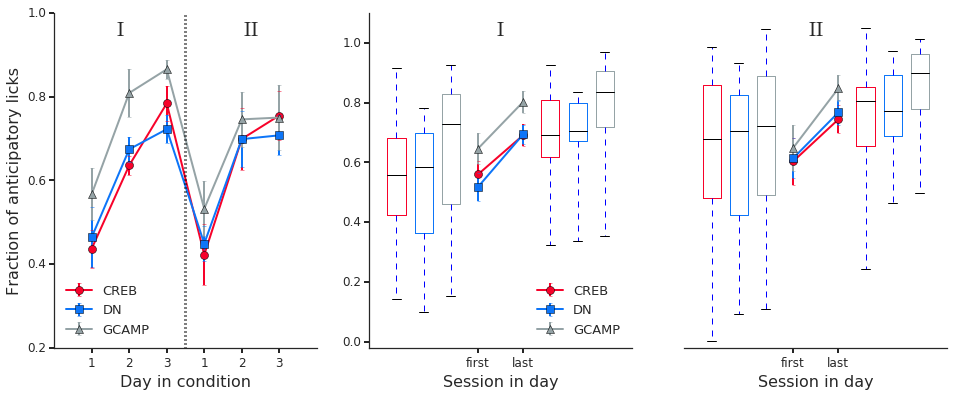

In [13]:
data={}

legend_fontsize=13

fig = plt.figure(figsize=(16, 6))
ant_zone_ax= fig.add_subplot(131)
fraction_licks_by_session_A_ax=fig.add_subplot(132)
fraction_licks_by_session_B_ax=fig.add_subplot(133)

# Fraction of licks - condition ------------------------------------------------------------------
groupby = [['expt'], ['mouseID', 'condition_day']]
plotby = ['condition_day']

#groupby=[['expt'], ['mouseID', 'X_condition', 'X_day']]
#plotby=['X_condition', 'X_day']

behavior_fn = ra.fraction_licks_near_rewards
behavior_kwargs = {'pre_window_cm': 5, 'exclude_reward': True}
activity_label = ''

filter_fn = None
filter_columns = None

data['ant_zone_licks']=plot_metric(
    ant_zone_ax, exptGrps,
    metric_fn=behavior_fn, activity_kwargs=behavior_kwargs,
    groupby=groupby,
    plotby=plotby, plot_method='line',
    activity_label=activity_label, colors=colors,
    label_every_n=1, label_groupby=False, markers=markers,
    markersize=8, rotate_labels=False, filter_fn=filter_fn,
    filter_columns=filter_columns, return_full_dataframes=False,
    linewidth=2)
ant_zone_ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
sns.despine(ax=ant_zone_ax)
ant_zone_ax.set_ylabel('Fraction of anticipatory licks')
ant_zone_ax.set_xlabel('Day in condition')
ant_zone_ax.set_title('')
day_number_only_label(ant_zone_ax)
label_conditions(ant_zone_ax)
ant_zone_ax.legend(loc='lower left', fontsize=legend_fontsize)
# reward_zone_ax.get_legend().set_visible(False)
# stackedText(reward_zone_ax, labels, colors=colors, loc=3, size=10)


# Fraction of licks - session ------------------------------------------------------------------

groupby = [['expt']]
plotby = ['X_condition', 'X_session']

filter_fn = lambda df: (df['X_session'] != '2') & (df['X_condition'] == '1')
filter_columns = ['X_session', 'X_condition']
line_kwargs = {'markersize': 8}
data['fraction_licks_by_session_A']=plot_metric(
    fraction_licks_by_session_A_ax, exptGrps,
    metric_fn=behavior_fn, activity_kwargs=behavior_kwargs,
    groupby=groupby, plotby=plotby, plot_method='box_and_line',
    activity_label=activity_label, colors=colors, notch=False,
    label_every_n=1, label_groupby=False, markers=markers,
    rotate_labels=False, line_kwargs=line_kwargs,
    filter_fn=filter_fn, filter_columns=filter_columns,
    flierprops={'markersize': 2, 'marker': 'o'}, box_width=0.4,
    box_spacing=0.2, return_full_dataframes=False, whis='range')
sns.despine(ax=fraction_licks_by_session_A_ax, top=True, right=True)
fraction_licks_by_session_A_ax.set_xticklabels(['first', 'last'])
fraction_licks_by_session_A_ax.set_xlabel('Session in day')
fraction_licks_by_session_A_ax.set_ylim(-0.02, 1.1)
fraction_licks_by_session_A_ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
fraction_licks_by_session_A_ax.set_title('')
fraction_licks_by_session_A_ax.legend(loc='lower right', fontsize=legend_fontsize)
# fraction_licks_by_session_A_ax.get_legend().set_visible(False)
fraction_licks_by_session_A_ax.text(
    0.5, .95, r'$\mathrm{I}$', ha='center', va='center',
transform=fraction_licks_by_session_A_ax.transAxes, fontsize=20)

filter_fn = lambda df: (df['X_session'] != '2') & (df['X_condition'] == '2')
filter_columns = ['X_session', 'X_condition']
data['fraction_licks_by_session_B']=plot_metric(
    fraction_licks_by_session_B_ax, exptGrps,
    metric_fn=behavior_fn, activity_kwargs=behavior_kwargs,
    groupby=groupby, plotby=plotby, plot_method='box_and_line',
    activity_label=activity_label, colors=colors,
    label_every_n=1, label_groupby=False, markers=markers,
    rotate_labels=False, line_kwargs=line_kwargs,
    filter_fn=filter_fn, filter_columns=filter_columns, notch=False,
    flierprops={'markersize': 2, 'marker': 'o'}, box_width=0.4,
    box_spacing=0.2, return_full_dataframes=False, whis='range')
sns.despine(
    ax=fraction_licks_by_session_B_ax, top=True, right=True, left=True)
fraction_licks_by_session_B_ax.tick_params(left=False, labelleft=False)
fraction_licks_by_session_B_ax.set_xticklabels(['first', 'last'])
fraction_licks_by_session_B_ax.set_xlabel('Session in day')
fraction_licks_by_session_B_ax.set_ylabel('')
fraction_licks_by_session_B_ax.set_ylim(-0.02, 1.0)
fraction_licks_by_session_B_ax.set_title('')
fraction_licks_by_session_B_ax.get_legend().set_visible(False)
fraction_licks_by_session_B_ax.text(
    0.5, .95, r'$\mathrm{II}$', ha='center', va='center',
transform=fraction_licks_by_session_B_ax.transAxes, fontsize=20)

# Supplemental

## Individual mouse task performance

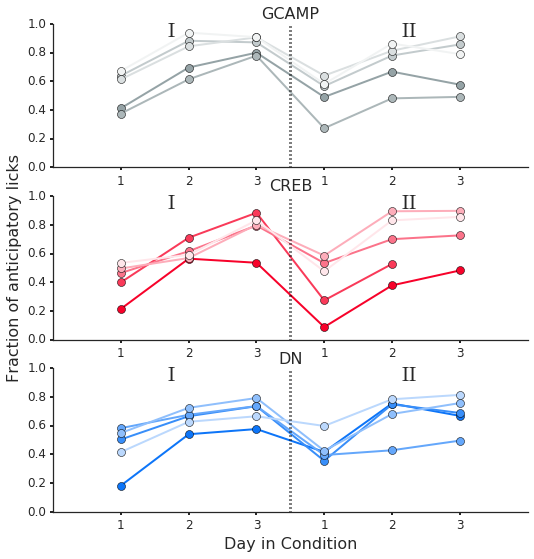

In [16]:
import copy 
creb_expt_grp=copy.copy(exptGrps[0])
dn_expt_grp=copy.copy(exptGrps[1])
gcamp_expt_grp=copy.copy(exptGrps[2])

behavior_fn = ra.fraction_licks_near_rewards
behavior_kwargs = {}
activity_label = ''

gcamp_colors = sns.light_palette(GCAMP_color, 5)[::-1]
creb_colors = sns.light_palette(CREB_color, 5)[::-1]
dn_colors = sns.light_palette(DN_color, 6)[::-1]

#markers = ('o', 'v', '^', 'D', '*', 's')
markers = ('o','o','o','o','o')

fig, axs = plt.subplots(6, 1, figsize=(8.5, 18))

sns.despine(fig)

gcamp_ax = axs[0]
creb_ax = axs[1]
dn_ax = axs[2]

for ax in list(axs.flat)[3:]:
    ax.set_visible(False)

gcamp_expt_grps = [gcamp_expt_grp.subGroup(list(expts['expt']), label=mouse)
                for mouse, expts in gcamp_expt_grp.dataframe(
                    gcamp_expt_grp, include_columns=['mouseID']).groupby(
                        'mouseID')]
creb_expt_grps = [creb_expt_grp.subGroup(list(expts['expt']), label=mouse)
                for mouse, expts in creb_expt_grp.dataframe(
                    creb_expt_grp, include_columns=['mouseID']).groupby(
                        'mouseID')]
dn_expt_grps = [dn_expt_grp.subGroup(list(expts['expt']), label=mouse)
                for mouse, expts in dn_expt_grp.dataframe(
                    dn_expt_grp, include_columns=['mouseID']).groupby(
                        'mouseID')]

plotting.plot_metric(
    gcamp_ax, gcamp_expt_grps,
    metric_fn=behavior_fn, activity_kwargs=behavior_kwargs,
    groupby=[['expt'], ['condition_day']],
    plotby=['condition_day'], plot_method='line', ms=8,
    activity_label=activity_label, colors=gcamp_colors, markers=markers,
    label_every_n=1, label_groupby=False, rotate_labels=False)
gcamp_ax.set_xlabel('Day in Condition')
gcamp_ax.set_title(gcamp_expt_grp.label())
gcamp_ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
gcamp_ax.set_xticklabels(['1', '2', '3', '1', '2','3'])
label_conditions(gcamp_ax)
gcamp_ax.set_xlabel('')
gcamp_ax.get_legend().set_visible(False)
gcamp_ax.tick_params(length=3, pad=2)

plotting.plot_metric(
    creb_ax, creb_expt_grps,
    metric_fn=behavior_fn, activity_kwargs=behavior_kwargs,
    groupby=[['expt'], ['condition_day']],
    plotby=['condition_day'], plot_method='line', ms=8,
    activity_label=activity_label, colors=creb_colors, markers=markers,
    label_every_n=1, label_groupby=False, rotate_labels=False)
creb_ax.set_xlabel('Day in Condition')
creb_ax.set_title(creb_expt_grp.label())
creb_ax.set_ylabel('Fraction of anticipatory licks')
creb_ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
creb_ax.set_xticklabels(['1', '2', '3', '1', '2','3'])
label_conditions(creb_ax)
creb_ax.set_xlabel('')
creb_ax.get_legend().set_visible(False)
creb_ax.tick_params(length=3, pad=2)

plotting.plot_metric(
    dn_ax, dn_expt_grps,
    metric_fn=behavior_fn, activity_kwargs=behavior_kwargs,
    groupby=[['expt'], ['condition_day']],
    plotby=['condition_day'], plot_method='line', ms=8,
    activity_label=activity_label, colors=dn_colors, markers=markers,
    label_every_n=1, label_groupby=False, rotate_labels=False)
dn_ax.set_xlabel('Day in Condition')
dn_ax.set_title(dn_expt_grp.label())
dn_ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
dn_ax.set_xticklabels(['1', '2', '3', '1', '2','3'])
label_conditions(dn_ax)
dn_ax.get_legend().set_visible(False)
dn_ax.tick_params(length=3, pad=2)
plt.show()

## Fraction of licks in reward zone


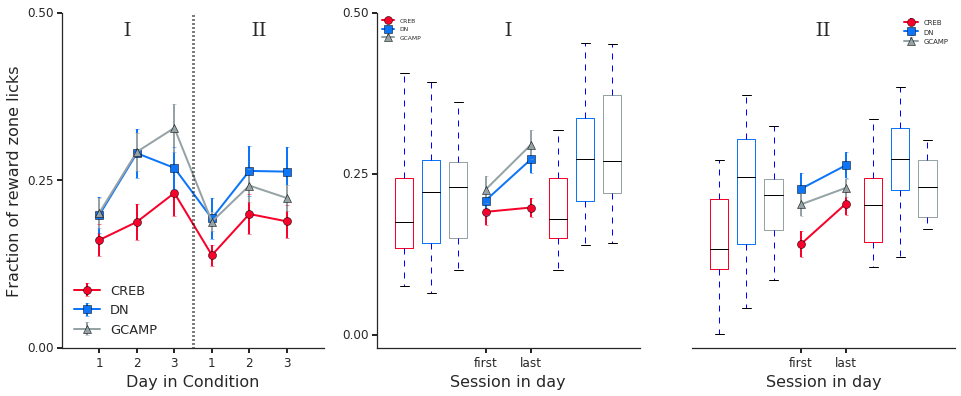

In [18]:
markers=creb.markers
legend_fontsize=13

#fig = plt.figure(figsize=(8, 8))
#reward_licks_by_session_A_ax= fig.add_subplot(111)

fig = plt.figure(figsize=(16, 6))
reward_zone_ax= fig.add_subplot(131)
reward_licks_by_session_A_ax=fig.add_subplot(132)
reward_licks_by_session_B_ax=fig.add_subplot(133)

# Fraction of licks - condition ------------------------------------------------------------------
groupby = [['expt'], ['mouseID', 'condition_day']]
plotby = ['condition_day']

#groupby=[['expt'], ['mouseID', 'X_condition', 'X_day']]
#plotby=['X_condition', 'X_day']

behavior_fn = ra.fraction_licks_in_reward_zone
behavior_kwargs={}
activity_label = ''

filter_fn = None
filter_columns = None

data['reward_zone_licks']=plot_metric(
    reward_zone_ax, exptGrps,
    metric_fn=behavior_fn, activity_kwargs=behavior_kwargs,
    groupby=groupby,
    plotby=plotby, plot_method='line',
    activity_label=activity_label, colors=colors,
    label_every_n=1, label_groupby=False, markers=markers,
    markersize=8, rotate_labels=False, filter_fn=filter_fn,
    filter_columns=filter_columns, return_full_dataframes=False,
    linewidth=2)
reward_zone_ax.set_yticks([0,0.25,0.5])
sns.despine(ax=reward_zone_ax)
reward_zone_ax.set_ylabel('Fraction of reward zone licks')
reward_zone_ax.set_xlabel('Day in Condition')
reward_zone_ax.set_title('')
day_number_only_label(reward_zone_ax)
label_conditions(reward_zone_ax)
reward_zone_ax.legend(loc='lower left', fontsize=legend_fontsize)
# reward_zone_ax.get_legend().set_visible(False)
# stackedText(reward_zone_ax, labels, colors=colors, loc=3, size=10)


# Fraction of licks - session ------------------------------------------------------------------

behavior_fn = ra.fraction_licks_in_reward_zone
behavior_kwargs={}

groupby = [['expt']]
plotby = ['X_condition', 'X_session']

filter_fn = lambda df: (df['X_session'] != '2') & (df['X_condition'] == '1')
filter_columns = ['X_session', 'X_condition']
line_kwargs = {'markersize': 8}
data['reward_zone_by_session_A']=plot_metric(
    reward_licks_by_session_A_ax, exptGrps,
    metric_fn=behavior_fn, activity_kwargs=behavior_kwargs,
    groupby=groupby, plotby=plotby, plot_method='box_and_line',
    activity_label=activity_label, colors=colors, notch=False,
    label_every_n=1, label_groupby=False, markers=markers,
    rotate_labels=False, line_kwargs=line_kwargs,
    filter_fn=filter_fn, filter_columns=filter_columns,
    flierprops={'markersize': 2, 'marker': 'o'}, box_width=0.4,
    box_spacing=0.2, return_full_dataframes=False, whis='range')
sns.despine(ax=reward_licks_by_session_A_ax, top=True, right=True)
reward_licks_by_session_A_ax.set_xticklabels(['first', 'last'])
reward_licks_by_session_A_ax.set_xlabel('Session in day')
reward_licks_by_session_A_ax.set_ylim(-0.02, .5)
reward_licks_by_session_A_ax.set_yticks([0, 0.25, 0.5])
reward_licks_by_session_A_ax.set_title('')
reward_licks_by_session_A_ax.legend(loc='upper left', fontsize=6)
# reward_licks_by_session_A_ax.get_legend().set_visible(False)
reward_licks_by_session_A_ax.text(
    0.5, .95, r'$\mathrm{I}$', ha='center', va='center',
transform=reward_licks_by_session_A_ax.transAxes, fontsize=20)



filter_fn = lambda df: (df['X_session'] != '2') & (df['X_condition'] == '2')
filter_columns = ['X_session', 'X_condition']
data['reward_zone_by_session_B']=plot_metric(
    reward_licks_by_session_B_ax, exptGrps,
    metric_fn=behavior_fn, activity_kwargs=behavior_kwargs,
    groupby=groupby, plotby=plotby, plot_method='box_and_line',
    activity_label=activity_label, colors=colors,
    label_every_n=1, label_groupby=False, markers=markers,
    rotate_labels=False, line_kwargs=line_kwargs,
    filter_fn=filter_fn, filter_columns=filter_columns, notch=False,
    flierprops={'markersize': 2, 'marker': 'o'}, box_width=0.4,
    box_spacing=0.2, return_full_dataframes=False, whis='range')
sns.despine(
    ax=reward_licks_by_session_B_ax, top=True, right=True, left=True)
reward_licks_by_session_B_ax.tick_params(left=False, labelleft=False)
reward_licks_by_session_B_ax.set_xticklabels(['first', 'last'])
reward_licks_by_session_B_ax.set_xlabel('Session in day')
reward_licks_by_session_B_ax.set_ylabel('')
reward_licks_by_session_B_ax.set_ylim(-0.02, .5)
reward_licks_by_session_B_ax.set_title('')
#reward_licks_by_session_B_ax.get_legend().set_visible(False)
reward_licks_by_session_B_ax.text(
    0.5, .95, r'$\mathrm{II}$', ha='center', va='center',
transform=reward_licks_by_session_B_ax.transAxes, fontsize=20)

## Lap and Lick Rate

Plotting of number_of_laps failed
Unrecognized column name: day_in_condition


ValueError: Length of values does not match length of index

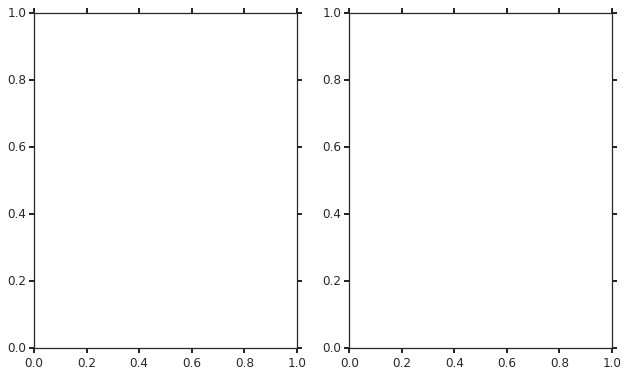

In [61]:
from lab.classes.classes import ExperimentGroup as eg

fig = plt.figure(figsize=(16, 6))

lap_rate_ax= fig.add_subplot(131)
lick_rate_ax=fig.add_subplot(132)
#fraction_licks_by_session_B_ax=fig.add_subplot(133)



groupby=[['expt','day_in_condition']]
plotby=None

behavior_fn = eg.number_of_laps
behavior_kwargs={'rate': True}
activity_label = ''
data['lap_rate']=plot_metric(
        ax=lap_rate_ax, exptGrps=exptGrps, roi_filters=roi_filters,
        metric_fn=behavior_fn, plot_method='swarm',
        groupby=groupby, plotby=None, activity_kwargs=behavior_kwargs,
        activity_label=activity_label,colors=colors,
        plot_bar=True, edgecolor='k', linewidth=0.5, size=3)
lap_rate_ax.set_title('')
#lap_rate_ax.set_ylabel('')
#lap_rate_ax.set_xlabel('')
#lap_rate_ax.get_legend().set_visible(False)
sns.despine(ax=lap_rate_ax)
#norm_auc_inset_ax.tick_params(bottom=False, labelbottom=False)
lap_rate_ax.set_ylim(0, .03)
lap_rate_ax.set_yticks([0, .01, .02,.03])
lap_rate_ax.spines['left'].set_linewidth(1)
lap_rate_ax.spines['bottom'].set_linewidth(1)
#lap_rate_ax.spines['bottom'].set_linewidth(1).set_xlim(-.1, .9)


behavior_fn = eg.number_of_licks
behavior_kwargs={}
activity_label = ''
data['lick_rate']=plot_metric(
        ax=lick_rate_ax, exptGrps=exptGrps, roi_filters=roi_filters,
        metric_fn=behavior_fn, plot_method='swarm',
        groupby=groupby, plotby=None, activity_kwargs=behavior_kwargs,
        activity_label=activity_label,colors=colors,
        plot_bar=True, edgecolor='k', linewidth=0.5, size=3)
lick_rate_ax.set_title('')
#lick_rate_ax.set_ylabel('')
#lick_rate_ax.set_xlabel('')
#lick_rate_ax.get_legend().set_visible(False)
sns.despine(ax=lick_rate_ax)
#norm_auc_inset_ax.tick_params(bottom=False, labelbottom=False)
lick_rate_ax.set_ylim(0, .03)
lick_rate_ax.set_yticks([0, .01, .02,.03])
lick_rate_ax.spines['left'].set_linewidth(1)
lick_rate_ax.spines['bottom'].set_linewidth(1)
#lick_rate_ax.spines['bottom'].set_linewidth(1).set_xlim(-.1, .9)


In [ ]:
lick_rate_ax.set_title('')
#lick_rate_ax.set_ylabel('')
#lick_rate_ax.set_xlabel('')
#lick_rate_ax.get_legend().set_visible(False)
sns.despine(ax=lick_rate_ax)
#norm_auc_inset_ax.tick_params(bottom=False, labelbottom=False)
lick_rate_ax.set_ylim(0, .03)
lick_rate_ax.set_yticks([0, .01, .02,.03])
lick_rate_ax.spines['left'].set_linewidth(1)
lick_rate_ax.spines['bottom'].set_linewidth(1)
#lick_rate_ax.spines['bottom'].set_linewidth(1).set_xlim(-.1, .9)

## Stats

In [20]:
# Statistical tests are in the statsmodels and scipy.stats packages
from statsmodels.formula.api import ols, mixedlm
from statsmodels.stats.anova import anova_lm
from scipy.stats import ttest_ind, levene, kstest, ks_2samp, mannwhitneyu

# Lab.misc.stats contains a few tests not found in other packages and some helper functions
import lab.misc.stats as stats

from lab.misc import save_data, save_figure
import cPickle as pickle

#### saving and loading from file

In [9]:
basename_pkl = save_data(data, method='pkl', label='behavior_condition')
#basename_csv = save_data(data, method='csv', label='behavior_condition')

# load prep
#loaded_data = pickle.load(open(basename_pkl + '.pkl', 'r'))
#data = stats.prep_data(loaded_data['ant_zone_licks'])

Data for behavior_condition saved to /home/matt/Dropbox/analysis/creb/figure_data/behavior_condition_2018-09-03-13h54m05s


#### prep and split df

In [21]:
data = stats.prep_data(data['ant_zone_licks'])
#split
data['condition'], data['day'] = data['condition_day'].str.split('_', 1).str

In [46]:
data.head()

,mouseID,condition_day,near_licks,total_licks,value,grp,condition,day
0,mjd012,A_0,154.333333,748.333333,0.199876,DN,A,0
1,mjd012,A_1,339.666667,608.333333,0.577423,DN,A,1
2,mjd012,A_2,438.000000,756.666667,0.608774,DN,A,2
3,mjd012,B_0,290.000000,713.333333,0.435672,DN,B,0
4,mjd012,B_1,721.333333,907.000000,0.796964,DN,B,1


In [55]:
# stats model, mixedlm
md=mixedlm("value ~ grp",df1,groups=df1["mouseID"])
mdf=md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: value  
No. Observations:  48      Method:             REML   
No. Groups:        16      Scale:              0.0274 
Min. group size:   3       Likelihood:         12.9605
Max. group size:   3       Converged:          Yes    
Mean group size:   3.0                                
------------------------------------------------------
             Coef. Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.619    0.039 15.874 0.000  0.543  0.695
grp[T.DN]    0.001    0.058  0.024 0.981 -0.112  0.115
grp[T.GCAMP] 0.128    0.058  2.218 0.027  0.015  0.242
groups RE    0.000    0.027                           



/home/matt/anaconda/lib/python2.7/site-packages/statsmodels/regression/mixed_linear_model.py:2019: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
# pyvtbbl (needs old numpy)
import pyvttbl as pt



## RPY2

In [22]:
%load_ext rpy2.ipython

In [23]:
# split condition into two dfs
df=data.groupby('condition')
df1=df.get_group('A')
df2=df.get_group('B')

In [24]:
%%R -i df1
# Condition A
options(contrasts=c("contr.sum","contr.poly"))
stress.aov <- with(df1, aov(value ~ grp * day + Error(mouseID /(grp))))
summary(stress.aov)


Error: mouseID
          Df Sum Sq Mean Sq F value Pr(>F)  
grp        2 0.1680 0.08401   3.239 0.0722 .
Residuals 13 0.3372 0.02593                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
          Df Sum Sq Mean Sq F value   Pr(>F)    
day        2 0.7830  0.3915 112.238 1.62e-13 ***
grp:day    4 0.0205  0.0051   1.472    0.239    
Residuals 26 0.0907  0.0035                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [68]:
%%R -i df2
# Condition B
stress.aov <- with(df2, aov(value ~ grp * day + Error(mouseID /(grp))))
summary(stress.aov)


Error: mouseID
          Df Sum Sq Mean Sq F value Pr(>F)
grp        2 0.0343 0.01715   0.290  0.754
day        1 0.0727 0.07269   1.228  0.290
Residuals 12 0.7104 0.05920               

Error: Within
          Df Sum Sq Mean Sq F value   Pr(>F)    
day        2 0.6853  0.3427  78.355 1.71e-11 ***
grp:day    4 0.0113  0.0028   0.644    0.636    
Residuals 25 0.1093  0.0044                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [62]:
%%R -i data
# no split
stress.aov <- with(data, aov(value ~ grp * condition * day + Error(mouseID /(grp*condition))))
summary(stress.aov)


Error: mouseID
          Df Sum Sq Mean Sq F value Pr(>F)
grp        2 0.1767 0.08837   1.353  0.295
condition  1 0.0064 0.00641   0.098  0.759
Residuals 12 0.7836 0.06530               

Error: mouseID:condition
              Df  Sum Sq Mean Sq F value Pr(>F)
condition      1 0.01390 0.01390   0.670  0.429
day            1 0.06116 0.06116   2.946  0.112
grp:condition  2 0.04396 0.02198   1.059  0.377
Residuals     12 0.24915 0.02076               

Error: Within
                  Df Sum Sq Mean Sq F value Pr(>F)    
day                2 1.4469  0.7235 184.458 <2e-16 ***
grp:day            4 0.0225  0.0056   1.434 0.2364    
condition:day      2 0.0198  0.0099   2.527 0.0898 .  
grp:condition:day  4 0.0109  0.0027   0.698 0.5969    
Residuals         51 0.2000  0.0039                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### linear mixed effects model

In [ ]:
#https://gribblelab.wordpress.com/2009/03/09/repeated-measures-anova-using-r/

In [36]:
%%R -i df1
require(nlme)
am2 <- with(df1, lme(value ~ grp * day,random = ~1|mouseID/grp))
print(anova(am2))
summary(am2)


            numDF denDF  F-value p-value
(Intercept)     1    26 804.8688  <.0001
grp             2    13   3.2393  0.0722
day             2    26 112.2381  <.0001
grp:day         4    26   1.4722  0.2393
Linear mixed-effects model fit by REML
 Data: NULL 
        AIC       BIC   logLik
  -31.70275 -11.74001 27.85138

Random effects:
 Formula: ~1 | mouseID
        (Intercept)
StdDev:  0.06116423

 Formula: ~1 | grp %in% mouseID
        (Intercept)   Residual
StdDev:  0.06116424 0.05906174

Fixed effects: value ~ grp * day 
                 Value  Std.Error DF    t-value p-value
(Intercept)  0.6621521 0.02333041 26  28.381506  0.0000
grp1        -0.0432231 0.03200905 13  -1.350339  0.1999
grp2        -0.0418258 0.03347587 13  -1.249432  0.2335
day1        -0.1727254 0.01210050 26 -14.274237  0.0000
day2         0.0442808 0.01210050 26   3.659422  0.0011
grp1:day1   -0.0093408 0.01660174 26  -0.562641  0.5785
grp2:day1    0.0165801 0.01736252 26   0.954938  0.3484
grp1:day2   -0.0272712 

In [41]:
%%R -i df1
require(lme4)
md = lmer(value ~ grp * day + (1|mouseID), data=df1)
print(anova(md))
summary(md)


Analysis of Variance Table
        Df  Sum Sq Mean Sq  F value
grp      2 0.02260 0.01130   3.2393
day      2 0.78304 0.39152 112.2381
grp:day  4 0.02054 0.00514   1.4722
Linear mixed model fit by REML ['lmerMod']
Formula: value ~ grp * day + (1 | mouseID)
   Data: df1

REML criterion at convergence: -55.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.15529 -0.41904  0.03008  0.56510  1.60072 

Random effects:
 Groups   Name        Variance Std.Dev.
 mouseID  (Intercept) 0.007482 0.08650 
 Residual             0.003488 0.05906 
Number of obs: 48, groups:  mouseID, 16

Fixed effects:
             Estimate Std. Error t value
(Intercept)  0.662152   0.023330  28.381
grp1        -0.043223   0.032009  -1.350
grp2        -0.041826   0.033476  -1.249
day1        -0.172725   0.012100 -14.274
day2         0.044281   0.012100   3.659
grp1:day1   -0.009341   0.016602  -0.563
grp2:day1    0.016580   0.017363   0.955
grp1:day2   -0.027271   0.016602  -1.643
grp2:day2    0.009

## Grids

In [ ]:
#play with grids
fig = plt.figure(figsize=(8.5, 11))
gs2 = plt.GridSpec(1,1,bottom=0)
fig.add_subplot(gs2[0])

gs1 = plt.GridSpec(12, 4)
gcamp_lick_axs = [fig.add_subplot(gs1[0, 0]),
           fig.add_subplot(gs1[0, 1]),
           fig.add_subplot(gs1[0, 2]),
           fig.add_subplot(gs1[0, 3])]
creb_lick_axs = [fig.add_subplot(gs1[1, 0]),
               fig.add_subplot(gs1[1, 1]),
               fig.add_subplot(gs1[1, 2]),
               fig.add_subplot(gs1[1, 3])]
dn_lick_axs = [fig.add_subplot(gs1[2, 0]),
               fig.add_subplot(gs1[2, 1]),
               fig.add_subplot(gs1[2, 2]),
               fig.add_subplot(gs1[2, 3])]